In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def fix_color(img):
    top = img[0]
    bottom = img[-1]
    left = img[:,0]
    right = img[:,-1]
    avg=np.mean([np.mean(top),np.mean(bottom),np.mean(left),np.mean(right)])
    if avg>128:
        return 255-img
    return img
def process_img(img):
    img=cv2.medianBlur(img,3)
    img=cv2.medianBlur(img,3)
    ret2,thresholded = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return fix_color(thresholded)
def get_min_rectangle(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    min_rects = []
    for contour in contours:
        min_rects.append(cv2.minAreaRect(contour))
    return min_rects
def plot_min_rects(img, min_rects):
    for rect in min_rects:
        box = cv2.boxPoints(rect)
        box = np.int64(box)
        cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
    plt.imshow(img)
def calculate_avg_rectangle_angle(rect):
    angles = []
    for r in rect:
        #detect which orientation the rectangle is in and adjust the angle accordingly fix meee TODO
        # if r[1][0] > r[1][1]:
        #     if r[2] < -45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] + 90)
        #     elif r[2] > 45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] - 90)
        # else:
        #     if r[2] < -45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] + 90)
        #     elif r[2] > 45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] - 90)
        angles.append(r[2])
    angles = np.array(angles)
    angle = np.mean(angles)
    std=np.std(angles)
    #gets the angles that are within 1 standard deviation of the mean
    print(angles)
    angles = angles[(angles > angle - std) & (angles < angle + std)]
    print(angles)
    angle = np.mean(angles)
    return angle
def rotate_image(img, angle):
    print(angle)
    (h, w) = img.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img
def rotate_processed_image(img):
    rects=get_min_rectangle(cv2.dilate(img, np.ones((3,3), np.uint8), iterations=7))
    angle=calculate_avg_rectangle_angle(rects)
    plot_min_rects(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), rects)
    rotated_img=rotate_image(img,angle)
    plt.imshow(rotated_img, cmap='gray')
    return rotated_img

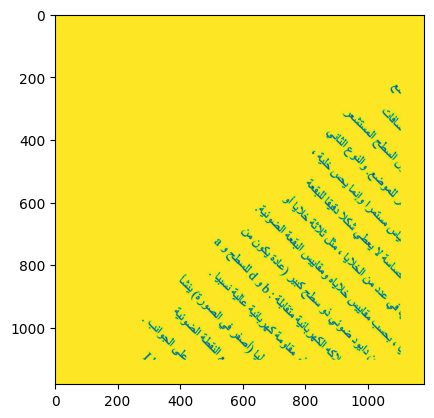

In [18]:
img=cv2.imread('../fonts-dataset/Marhey/990.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

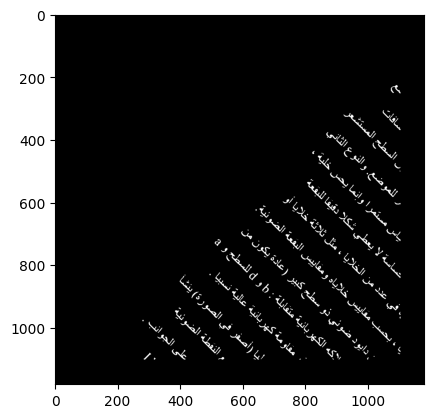

In [19]:
img=process_img(img)
plt.imshow(img, cmap='gray')

[90.         90.         90.         90.         45.55625153 44.23609924
 90.         45.74405289 44.3904953  45.         46.54815674 90.
 44.79315567 90.         90.         90.         44.07595825 45.
 44.40110779 45.         45.         90.         45.59592056 45.
 44.83391953 45.49605942 45.         90.         45.         90.
 43.22119904 45.         90.        ]
[45.55625153 44.23609924 45.74405289 44.3904953  45.         46.54815674
 44.79315567 44.07595825 45.         44.40110779 45.         45.
 45.59592056 45.         44.83391953 45.49605942 45.         45.
 43.22119904 45.        ]
44.94461879730225


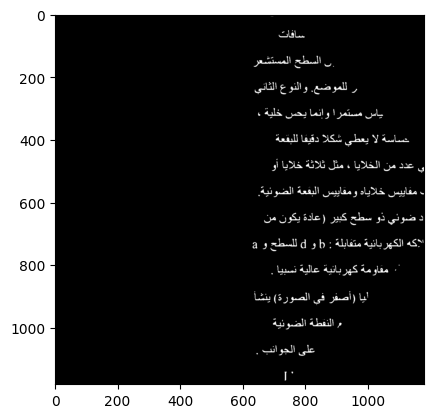

In [20]:
rotated=rotate_processed_image(img)